# Notebook structure
  ## - 1. build a two layers CNN
  ## - 2. Add more layers to build a deep CNN
    - 3 convolution layers
    - 2 fully connected layers
###          -  compare this two CNN structure
  ## - 3.`keep_prob` rate VS `dropout` rate

# 1. build a two layers CNN

In [1]:
# Lab 11 MNIST and Convolutional Neural Network
import tensorflow as tf
import random


from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
'''

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
'''

# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime.
Epoch: 0001 cost = 0.358494761
Epoch: 0002 cost = 0.097940919
Epoch: 0003 cost = 0.070362408
Epoch: 0004 cost = 0.056949024
Epoch: 0005 cost = 0.047772202
Epoch: 0006 cost = 0.039817694
Epoch: 0007 cost = 0.034906245
Epoch: 0008 cost = 0.030535142
Epoch: 0009 cost = 0.027481223
Epoch: 0010 cost = 0.023806905
Epoch: 0011 cost = 0.021045868
Epoch: 0012 cost = 0.018816113
Epoch: 0013 cost = 0.015678865
Epoch: 0014 cost = 0.014327407
Epoch: 0015 cost = 0.011730368
Learning Finished!
Accuracy: 0.9849
Label:  [3]
Prediction:  [3]


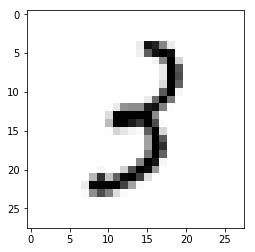

In [3]:
import matplotlib.pyplot as plt
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

## - compare this two CNN structure
### 2 layers CNN

- layer1  L1 ImgIn shape=(?, 28, 28, 1)     
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)     
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)     
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)     

- layer2  L2 ImgIn shape=(?, 14, 14, 32)     
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)      
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)      
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)     

- Final FC 7x7x64 inputs -> 10 outputs     
Tensor("***Reshape_1:0***", shape=(?, 3136), dtype=float32)     


**- Epoch: 0015 cost = 0.011730368**
- Learning Finished!
- **Accuracy: 0.9849**

========================================================================

**- Epoch: 0015 cost = 0.025256706**
- Learning Finished!
- **Accuracy: 0.9932**
  

### 5 layers(DEEP) CNN


- layer1  L1 ImgIn shape=(?, 28, 28, 1)     
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)    
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)    
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)    
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)     
 
- layer2  L2 ImgIn shape=(?, 14, 14, 32)     
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)    
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)    
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)     
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)    

- layer3  L3 ImgIn shape=(?, 7, 7, 64)    
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)    
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)    
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)    
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)    
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)    

- layer4  L4 FC 4x4x128 inputs -> 625 outputs    
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)     
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)    

- layer5 L5 Final FC 625 inputs -> 10 outputs    
Tensor("add_1:0", shape=(?, 10), dtype=float32)    

#  3. `keep_prob` rate VS `dropout` rate
In TensorFlow, there are two functions that perform the dropout

`tf.layers.dropout` uses `dropout` rate
 - 0.7 means 70% will be dropped

`tf.contrib.layers.dropout` uses `keep_prob` instead
 - 0.7 means 70% will be kept

**`dropout rate = 1 - keep_prob`**

### "`dropout`" is usually inserted before the `FC layers` 
### it's not standard to insert it before the Conv-Layers.

The reason is that Conv-Layers already have local sparse connection structures 
and are less prone to overfitting.

Nevertheless, it's okay to use it in the scripts for demonstration.

# 2. DEEP CNN

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime.
Epoch: 0001 cost = 0.410797768
Epoch: 0002 cost = 0.099555811
Epoch: 0003 cost = 0.075134781
Epoch: 0004 cost = 0.062321061
Epoch: 0005 cost = 0.052901570
Epoch: 0006 cost = 0.048923441
Epoch: 0007 cost = 0.042905460
Epoch: 0008 cost = 0.038277411
Epoch: 0009 cost = 0.035422171
Epoch: 0010 cost = 0.035207811
Epoch: 0011 cost = 0.031567930
Epoch: 0012 cost = 0.028431041
Epoch: 0013 cost = 0.029581306
Epoch: 0014 cost = 0.027195767
Epoch: 0015 cost = 0.025256706
Learning Finished!
Accuracy: 0.9932
Label:  [2]
Prediction:  [2]


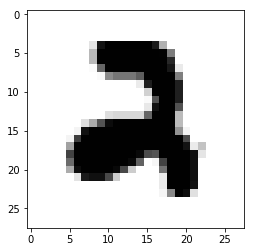

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''

# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy

# if you have a OOM error, please refer to lab-11-X-mnist_deep_cnn_low_memory.py

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()